     ┌───┐                                                                  »
q_0: ┤ H ├─■───────────■────────────────■───────────────────────■───────────»
     └───┘ │P(1.5708)  │          ┌───┐ │                       │           »
q_1: ──────■───────────┼──────────┤ H ├─┼───────────■───────────┼───────────»
                       │P(0.7854) └───┘ │           │P(1.5708)  │           »
q_2: ──────────────────■────────────────┼───────────■───────────┼───────────»
                                        │P(0.3927)              │           »
q_3: ───────────────────────────────────■───────────────────────┼───────────»
                                                                │P(0.19635) »
q_4: ───────────────────────────────────────────────────────────■───────────»
                                                                            »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────

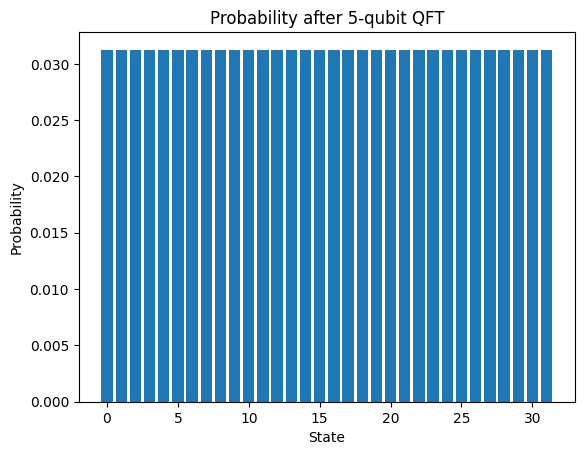

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np # Import numpy

def qft(circuit, n):
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            angle = 3.14159 / (2 ** (k-j))
            circuit.cp(angle, k, j)
    for i in range(n//2):
        circuit.swap(i, n - i - 1)

n_qubits = 5
qc = QuantumCircuit(n_qubits)
qft(qc, n_qubits)
print(qc.draw(output='text'))

backend = Aer.get_backend('statevector_simulator')
# Transpile the circuit for the backend
tqc = transpile(qc, backend=backend)

# Run the transpiled circuit
job = backend.run(tqc)
result = job.result()

statevector = np.asarray(result.get_statevector()) # Explicitly cast to numpy array
probabilities = [abs(amplitude)**2 for amplitude in statevector]

plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Probability after 5-qubit QFT')
plt.show()